### Assignment 4 ###


In [1]:
# Import required libraries 
import numpy as np
import pandas as pd

import math
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Q5_ read the beer file 
beerrating_df=pd.read_excel('Q5_Beer_Taste.xlsx')

beerrating_df.sample(10)

,Person,Rating
24,25,72
38,39,78
53,54,100
48,49,91
55,56,73
9,10,82
0,1,100
15,16,86
6,7,81
49,50,73


In [3]:
#Q5 Check Data Quality
beerrating_df.set_index('Person', inplace=True )
beerrating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rating  60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [4]:
beerrating_df.sample(5)

,Rating
Person,
14,58
5,94
22,76
26,70
37,76


In [5]:
beerrating_mean=beerrating_df['Rating'].mean()
beerrating_sd=beerrating_df['Rating'].std()
print('The beerrating mean is %2f and the stad deviation is %2f ' %(beerrating_mean,beerrating_sd) )

The beerrating mean is 79.750000 and the stad deviation is 14.502630 


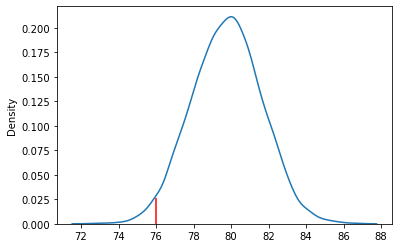

In [6]:
# let us draw  the population 
pop_rating=st.norm.rvs(loc=beerrating_mean,scale=beerrating_sd/math.sqrt(60),size=6000 )
sns.kdeplot(pop_rating)
plt.vlines(x=76,ymin=0,ymax=0.026,colors='r')

$$ Null Hypothesis: \mu \le 76$$
$$ Alternate Hypotesis: \mu > 76$$

$$P(Sample Mean > 76 \mid mean \le 76)$$

In [7]:
z= (76-beerrating_mean)/math.sqrt(beerrating_sd/20)
print(z)

-4.403752319687284


In [8]:
p_val =st.norm.cdf(z)
print('Calculated P-value is %3f ' % p_val)

Calculated P-value is 0.000005 


In [9]:
# Q5 Since the the p value is very low , we may reject the "Null Hypothesis"
# The 2 0 smaple  beer rating will have a scaore of higher than 76

 ## Q6 {Low calorie Drink Priference} ##

In [10]:
drink_pref_df=pd.read_excel('Q6_LowcalorieDrink.xlsx')
drink_pref_df.sample(10)

,Consumer,Gender,Age,Preference
208,209,M,Between 20 and 40,Competing brand
133,134,F,Between 20 and 40,Competing brand
38,39,F,Between 20 and 40,Competing brand
158,159,F,Over 60,Our brand
63,64,M,Between 40 and 60,Our brand
149,150,M,Over 60,Our brand
66,67,F,Between 40 and 60,Our brand
91,92,M,Between 20 and 40,Our brand
202,203,F,Over 60,Competing brand
71,72,M,Over 60,Competing brand


In [11]:
drink_pref_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Consumer    250 non-null    int64 
 1   Gender      250 non-null    object
 2   Age         250 non-null    object
 3   Preference  250 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.9+ KB


In [12]:
drink_pref_df.set_index('Consumer',inplace=True)

In [13]:
drink_pref_df.head()

,Gender,Age,Preference
Consumer,,,
1,F,Over 60,Our brand
2,F,Between 40 and 60,Our brand
3,M,Between 40 and 60,Our brand
4,F,Over 60,Competing brand
5,M,Between 20 and 40,Our brand


In [14]:
drink_pref_df.groupby('Preference').agg(["count"])

,Gender,Age
,count,count
Preference,,
Competing brand,116,116
Our brand,134,134


In [15]:
per_ourbrand =116/250
per_compbrand=134/250

#assume poulation s choice for our brand will be normally distributed
#P-hat +/- z_a/2*sqrt((p-hat*q-hat)/n)

print('our brand preference in the sample is  %2f percent'%round(per_ourbrand*100))

our brand preference in the sample is  46.000000 percent


In [16]:
(0.46+(1.96*math.sqrt(.46*.54/250)),0.46-(1.96*math.sqrt(.46*.54/250)))

(0.5217819857239956, 0.3982180142760044)

In [17]:
# In the poulation the choice for our brand will be between 52% to 40% given 95 percent confidence level 

#b) The sample data does not provide information on geographies (urban / rural )- so asserattion is false.

#C) sample is unnecessary large to judge brand preference

## Questtion 7 ##

In [20]:
brand1_df=pd.read_excel('Q7_Battery_life.xlsx',sheet_name='Brand1',index_col='Battery')
brand2_df=pd.read_excel('Q7_Battery_life.xlsx',sheet_name='Brand2',index_col='Battery')
brand1_df.sample(10)

,Lifetime
Battery,
62,102.31
25,99.84
69,98.75
76,98.26
33,99.69
81,101.26
20,102.58
24,96.23
18,102.48


In [21]:
brand2_df.sample(10)

,Lifetime
Battery,
57,103.97
83,102.46
64,99.62
92,89.44
72,97.37
98,101.32
87,96.92
10,96.87
56,103.68


In [22]:
brand1_mean=brand1_df['Lifetime'].mean()
brand1_sd=brand1_df['Lifetime'].std()
brand2_mean=brand2_df['Lifetime'].mean()
brand2_sd=brand2_df['Lifetime'].std()

In [23]:
print('The brand1_battery mean is %2f and the std deviation is %2f ' %(brand1_mean,brand1_sd) )
print('The brand2_battery mean is %2f and the std deviation is %2f ' %(brand2_mean,brand2_sd) )

The brand1_battery mean is 100.089800 and the std deviation is 2.821051 
The brand2_battery mean is 99.559400 and the std deviation is 6.306306 


In [31]:
brand1_df = brand1_df.rename(columns={'Lifetime': 'Lifetime_Brand1'})
brand2_df = brand2_df.rename(columns={'Lifetime': 'Lifetime_Brand2'})

In [35]:
combined_df=pd.concat([brand1_df,brand2_df],axis=1)

In [38]:
combined_df.sample(5)

,Lifetime_Brand1,Lifetime_Brand2
Battery,,
85,99.30,101.97
4,97.07,99.45
5,99.97,102.55
54,101.69,102.49
74,102.56,95.82


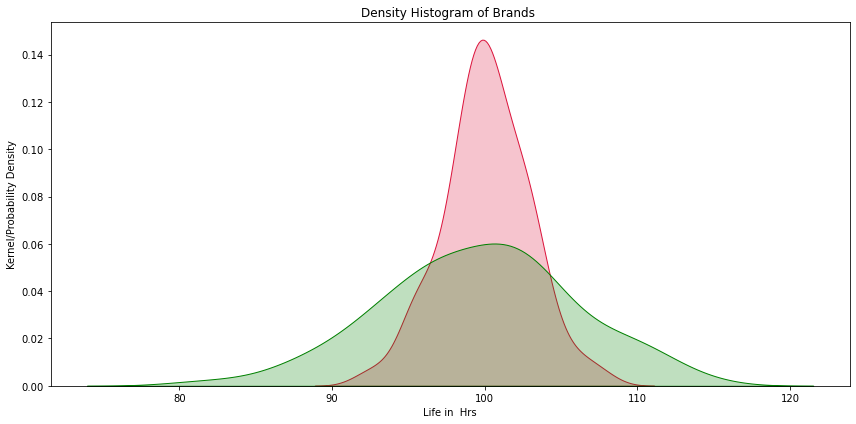

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=combined_df.Lifetime_Brand1,color='crimson', fill='true', ax=ax)
sns.kdeplot(data=combined_df.Lifetime_Brand2,color='green', fill='true', ax=ax)
plt.xlabel("Life in  Hrs")
plt.ylabel ("Kernel/Probability Density")
plt.title("Density Histogram of Brands ")

plt.tight_layout()
plt.show()

In [ ]:
# let us condider 
# Ha: mean brand1 > mean brand2

#H0:  mean brand1 <=  mean brand2 

#let us do a T test onboth distribution  and man whitney test 


In [50]:
stat, p_value = st.ttest_ind(combined_df.Lifetime_Brand1, combined_df.Lifetime_Brand2)
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

t-test: statistic=0.7677, p-value=0.4436


In [52]:
stat, p_value = st.mannwhitneyu(combined_df.Lifetime_Brand1, combined_df.Lifetime_Brand2)
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann–Whitney U Test: statistic=5244.0000, p-value=0.5519


In [ ]:
# We found out both cases the p value is higher than 0.05 ; so we can not reject the NULL Hypthesis  

In [ ]:
st.chi2.ppf(1-.05, df=1)